**Reduced batch size with chnage in optimizer**

In [0]:
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop
from keras import optimizers
import matplotlib.pyplot as plt
import numpy as np

Using TensorFlow backend.


In [0]:
batch_size = 32
num_classes = 10
epochs =40

In [0]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [0]:
x_train = x_train.reshape(50000, 3072)
x_test = x_test.reshape(10000, 3072)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

50000 train samples
10000 test samples


In [0]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [0]:
model = Sequential()
model.add(Dense(640, activation='relu', input_shape=(3072,)))
model.add(Dropout(0.2))
model.add(Dense(640, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

In [0]:
adamax=keras.optimizers.Adamax(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0)
model.compile(loss='mean_squared_error', optimizer=adamax,metrics=['accuracy'])

In [0]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 50000 samples, validate on 10000 samples
Epoch 1/40
50000/50000 [==============================] - 13s 262us/step - loss: 0.0820 - acc: 0.2796 - val_loss: 0.0783 - val_acc: 0.3440
Epoch 2/40
50000/50000 [==============================] - 12s 234us/step - loss: 0.0772 - acc: 0.3518 - val_loss: 0.0748 - val_acc: 0.3852
Epoch 3/40
50000/50000 [==============================] - 12s 234us/step - loss: 0.0749 - acc: 0.3790 - val_loss: 0.0734 - val_acc: 0.3987
Epoch 4/40
50000/50000 [==============================] - 12s 233us/step - loss: 0.0731 - acc: 0.4023 - val_loss: 0.0711 - val_acc: 0.4291
Epoch 5/40
50000/50000 [==============================] - 12s 233us/step - loss: 0.0718 - acc: 0.4187 - val_loss: 0.0703 - val_acc: 0.4341
Epoch 6/40
50000/50000 [==============================] - 12s 233us/step - loss: 0.0704 - acc: 0.4329 - val_loss: 0.0687 - val_acc: 0.4490
Epoch 7/40
50000/50000 [==============================] - 12s 232us/step - loss: 0.0694 - acc: 0.4438 - val_loss: 0.

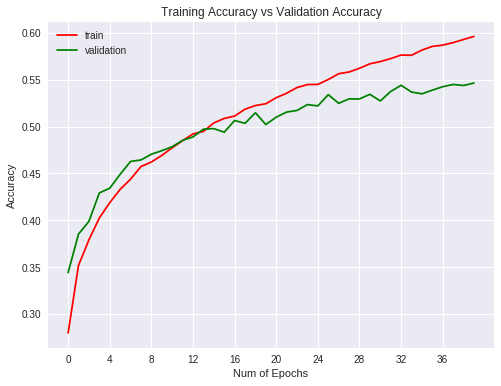

In [0]:
plt.figure(0)
plt.plot(history.history['acc'],'r')
plt.plot(history.history['val_acc'],'g')
plt.xticks(np.arange(0, 40, 4.0))
plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel("Num of Epochs")
plt.ylabel("Accuracy")
plt.title("Training Accuracy vs Validation Accuracy")
plt.legend(['train','validation'])
plt.show()

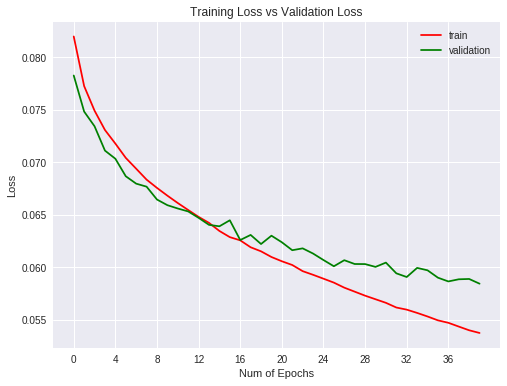

In [0]:
plt.figure(1)
plt.plot(history.history['loss'],'r')
plt.plot(history.history['val_loss'],'g')
plt.xticks(np.arange(0, 40, 4.0))
plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel("Num of Epochs")
plt.ylabel("Loss")
plt.title("Training Loss vs Validation Loss")
plt.legend(['train','validation'])
plt.show()

**Conclusion:**
The change in optimizer and reduced batch size had given the best model of all. Good accuracy compared to other models with low loss.